In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
# Data
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [7]:
# Model & Prediction
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [8]:
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
y_pred = gbm_model.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_pred, y_test))

350.24238092379187

In [17]:
# Model Tuning
gbm_params = {"learning_rate": [0.1, 0.01],
              "max_depth": [3, 5],
              "n_estimators": [100, 200],
              "subsample": [1, 0.5],
              "loss": ["ls", "lad"]}

In [18]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [19]:
gbm_cv = GridSearchCV(gbm_model, gbm_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   41.4s finished


In [20]:
gbm_cv.best_params_

{'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.5}

In [24]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                      loss = 'ls',
                                      max_depth = 5,
                                      n_estimators = 100,
                                      subsample = 0.5).fit(X_train, y_train)

In [25]:
y_pred = gbm_tuned.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_pred, y_test))

314.2058013530798

### Variable Importance Level

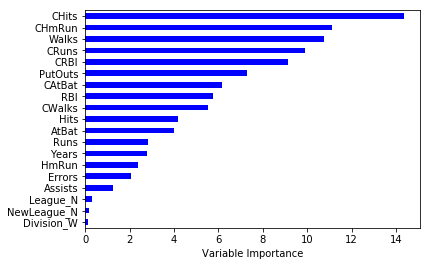

In [28]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_ * 100},
                            index = X_train.columns)


Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'b')

plt.xlabel('Variable Importance')
plt.gca().legend_ = None 